In [1]:
import xarray as xr
import s3fs

In [2]:
%%time
fs = s3fs.S3FileSystem(anon=False)

s3path="s3://dev-et-data/logan/nogales.nc"
fobj = fs.open(s3path)
DS = xr.open_dataset(fobj, engine='h5netcdf')

CPU times: user 428 ms, sys: 183 ms, total: 611 ms
Wall time: 1.68 s


In [3]:
! aws s3 ls dev-et-data/logan/

                           PRE in/
2021-02-05 16:08:26 1165746958 mini_square_maine.nc
2021-02-05 16:08:43 1165735531 mini_square_maine.pickle
2021-02-05 16:20:00 1165746958 nogales.nc
2021-02-05 16:20:18 1165735531 nogales.pickle
2021-01-28 16:42:57 7320886888 square_maine.nc
2021-01-28 16:44:57 7320875459 square_maine.pickle
2021-01-19 17:22:11 2151785664 water.nc


In [4]:
DS

<xarray.Dataset>
Dimensions:  (datePR: 56, time: 56, x: 3134, y: 1107)
Coordinates:
  * datePR   (datePR) object b'2018-10-15_036_038' ... b'2016-05-02_036_038'
  * time     (time) object b'2018-10-15' b'2018-09-29' ... b'2016-05-02'
  * y        (y) float64 3.629e+06 3.629e+06 3.629e+06 ... 3.596e+06 3.596e+06
  * x        (x) float64 3.492e+05 3.492e+05 3.493e+05 ... 4.432e+05 4.432e+05
Data variables:
    red      (datePR, y, x) int16 ...
    green    (datePR, y, x) int16 ...
    blue     (datePR, y, x) int16 ...
Attributes:
    crs:      [32619]

# the below animation blows up memory with larger AOIs
## fixes include
- animate with separate png files
- explore using dask
- use COG overviews from single bands
- `make smaller use mini_square_maine`

Generating 56 frame animation
    Exporting animation to ./nogales.gif


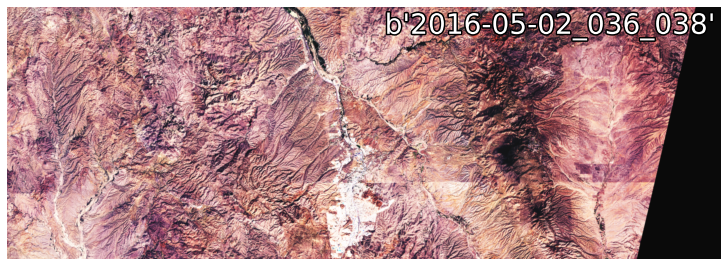

In [5]:
from notebookLib.nb_animate import nb_animated_timeseries

nb_animated_timeseries(DS,output_path='./nogales.gif',bands = ['red', 'green', 'blue'], time_dim='datePR',  
      percentile_stretch=(.2,.85), interval=1200)

In [6]:
DS

<xarray.Dataset>
Dimensions:  (datePR: 56, time: 56, x: 3134, y: 1107)
Coordinates:
  * datePR   (datePR) object b'2018-10-15_036_038' ... b'2016-05-02_036_038'
  * time     (time) object b'2018-10-15' b'2018-09-29' ... b'2016-05-02'
  * y        (y) float64 3.629e+06 3.629e+06 3.629e+06 ... 3.596e+06 3.596e+06
  * x        (x) float64 3.492e+05 3.492e+05 3.493e+05 ... 4.432e+05 4.432e+05
Data variables:
    red      (datePR, y, x) int16 7926 7095 7159 7814 9259 10462 ... 0 0 0 0 0 0
    green    (datePR, y, x) int16 8498 7539 7586 8223 9255 10383 ... 0 0 0 0 0 0
    blue     (datePR, y, x) int16 8622 8120 8252 8697 10569 11623 ... 0 0 0 0 0
Attributes:
    crs:      [32619]